# Loan Request Prediction
***
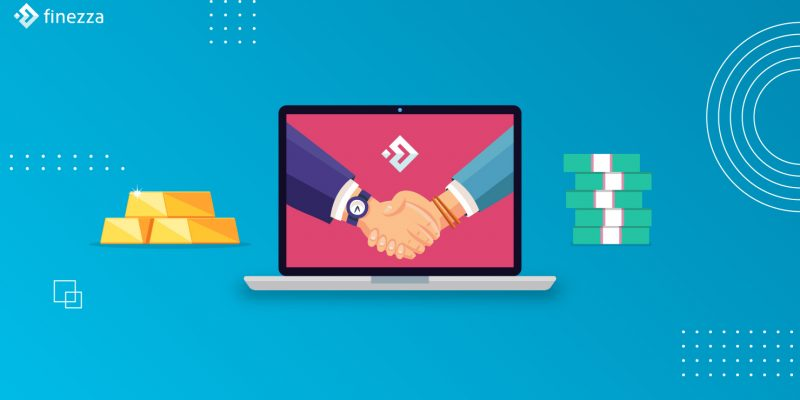

## Overview

To develop a predictive model that estimates the loan borrower is eligible to received based on their financial attributes. This project will follow the process of OSEM:

* Obtaining Data
* Scrubbing/Cleaning Data
* Exploring/Visualing Data
* Final Cleaning Data
* Modeling
* Anaylsis
* Conclusion


## Business Problem

The business problem is centered around a financial institution, such as a bank or lending agency, that faces challenges in efficiently and accurately assessing loan applications. The primary goal is to optimize the loan approval process and reduce the risk associated with loan disbursals while ensuring responsible lending practices.

## Obtaining Data
Definition of the columns

**no_of_dependents:** Number of Dependents of the Applicant

**education:** Education of the Applicant

**self_employed:** Employment Status of the Applicant

**income_annum:** Annual Income of the Applicant

**loan_amount:** Loan Amount Requested by the Applicant

**loan_term:** Loan Term in Years

**cibil_score:** Credit Score

**loan_status:** Loan Approval Status

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Data
df1 = pd.read_csv('Data/loan_approval_dataset.csv')

In [2]:
# Inspect the first 5 rows
df1.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Inspect if there are any null values
df1.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
# Print dataframe summary and shape
df1.info();
print("\nDataframe shape: ", df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB

Dataframe shap

In [5]:
# Identify number of rows are duplicates
(df1.duplicated("loan_id")).sum()

0

In [6]:
df1.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Cleaning Data

In [7]:
# Inspecting columns
df1.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
# Removing space of each columns
df1.columns = df1.columns.str.lstrip()

In [9]:
# Removing space of in each rows in specific columns
df1[['education', 'self_employed', 'loan_status']] = df1[['education', 'self_employed', 
                                                          'loan_status']].apply(lambda x : x.str.strip())

In [10]:
df1 = df1.drop(columns = ['loan_id'])

In [11]:
# importing libraries
from sklearn.preprocessing import OrdinalEncoder

In [12]:
# Passing the data with object types into dummies, using ranks for 0 for no and 1 for yes
rank=['Not Graduate','Graduate']
oe = OrdinalEncoder(categories=[rank])
df1['education'] = oe.fit_transform(df1[['education']])

rank=['Rejected','Approved']
oe = OrdinalEncoder(categories=[rank])
df1['loan_status'] = oe.fit_transform(df1[['loan_status']])

oe = OrdinalEncoder()
df1['self_employed'] = oe.fit_transform(df1[['self_employed']])

In [13]:
# Inspecting the first 5 rows
df1.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1.0
1,0,0.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0.0
2,3,1.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0.0
3,3,1.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0.0
4,5,0.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0.0


## Data Visualisation

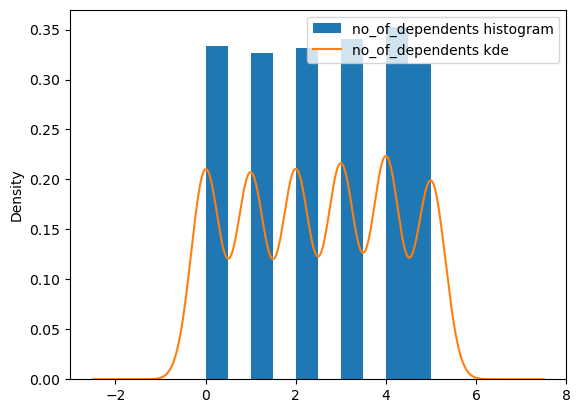

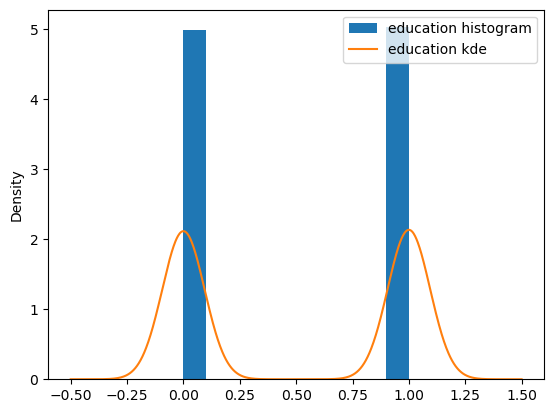

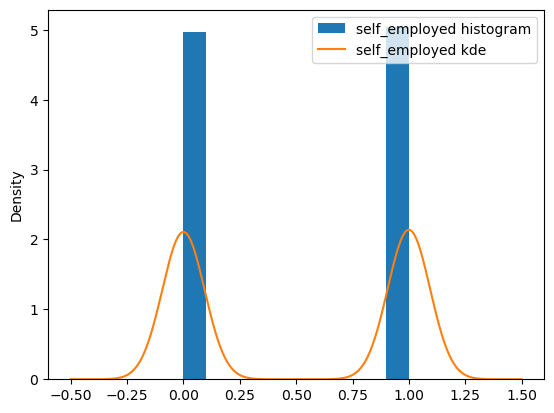

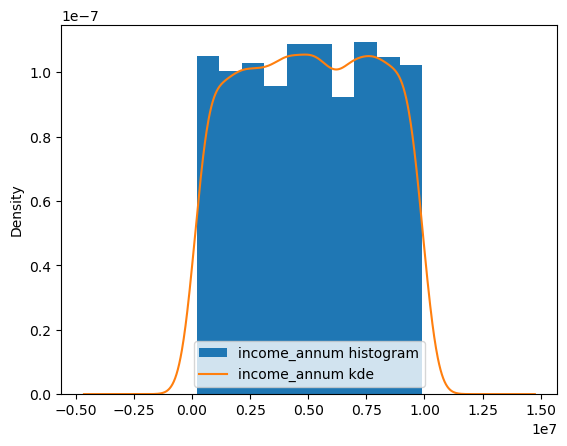

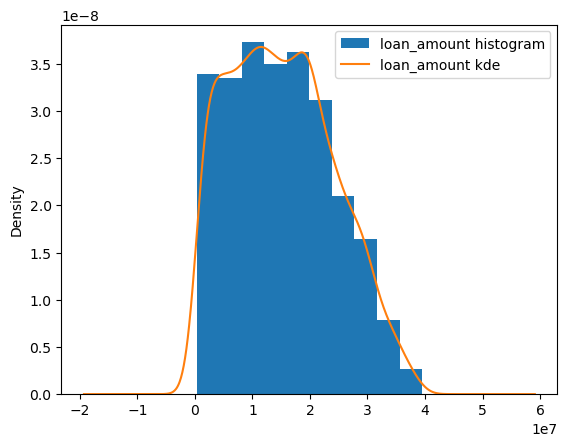

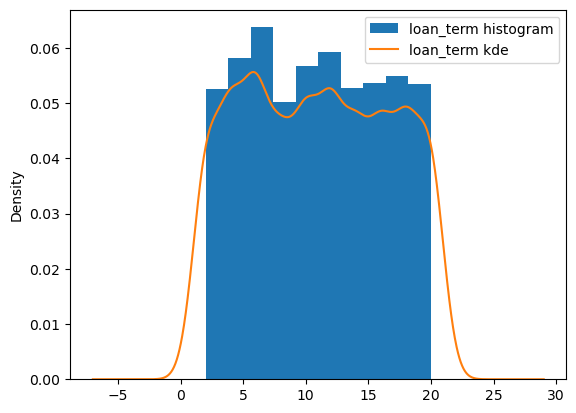

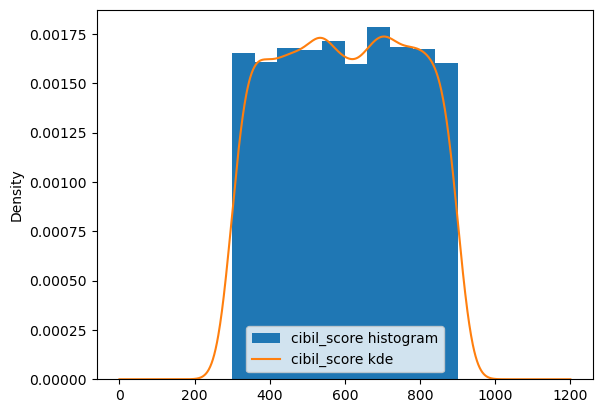

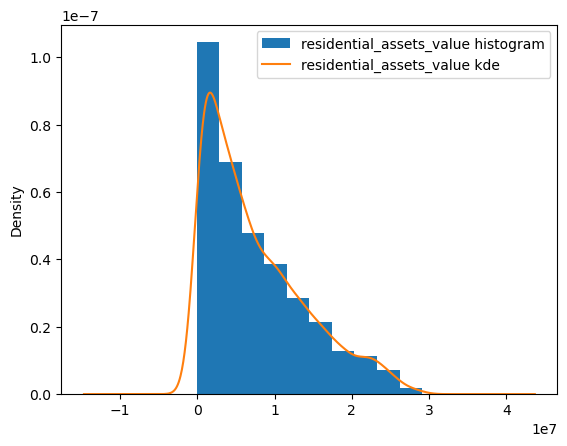

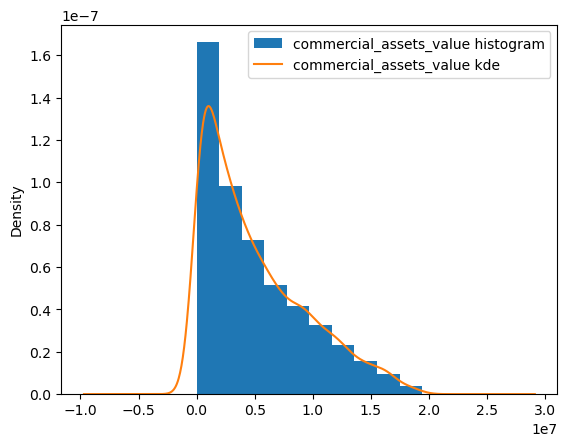

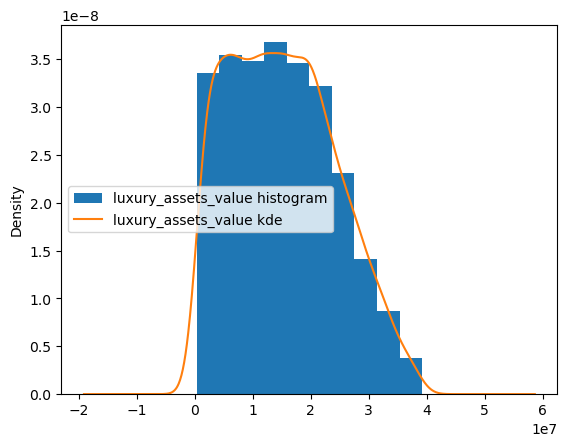

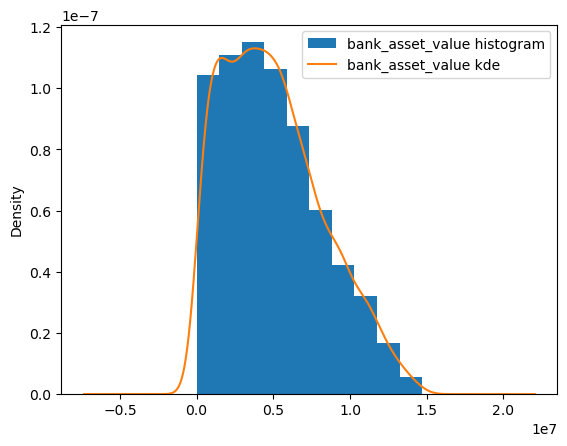

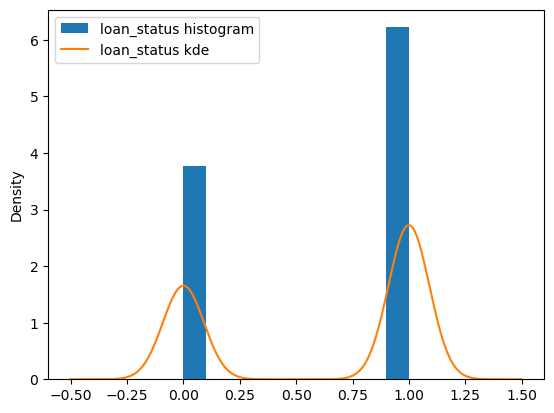

In [14]:
for col in df1:
    df1[col].plot.hist(density = True, label = col + ' histogram')
    df1[col].plot.kde(label = col + ' kde')
    plt.legend()
    plt.show()

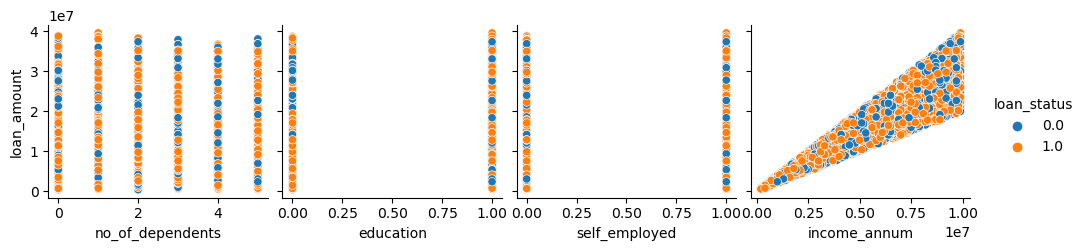

In [15]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['no_of_dependents', 'education', 'self_employed', 'income_annum'], y_vars=['loan_amount'], 
             hue= 'loan_status');

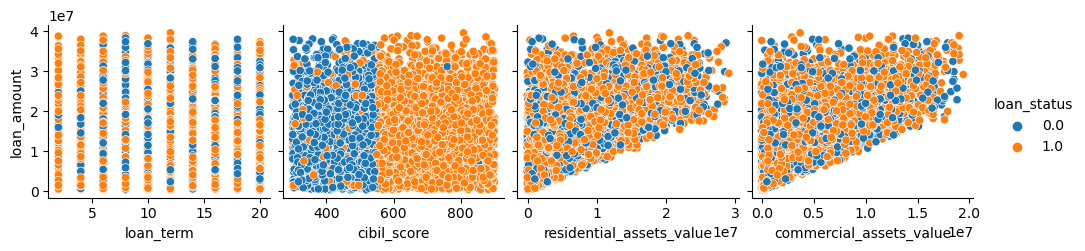

In [16]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value'],
             y_vars=['loan_amount'], hue= 'loan_status');

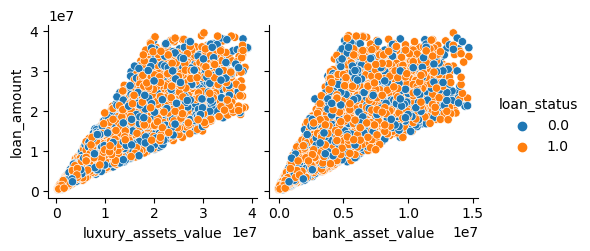

In [17]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['luxury_assets_value', 'bank_asset_value'], y_vars=['loan_amount'], hue= 'loan_status');

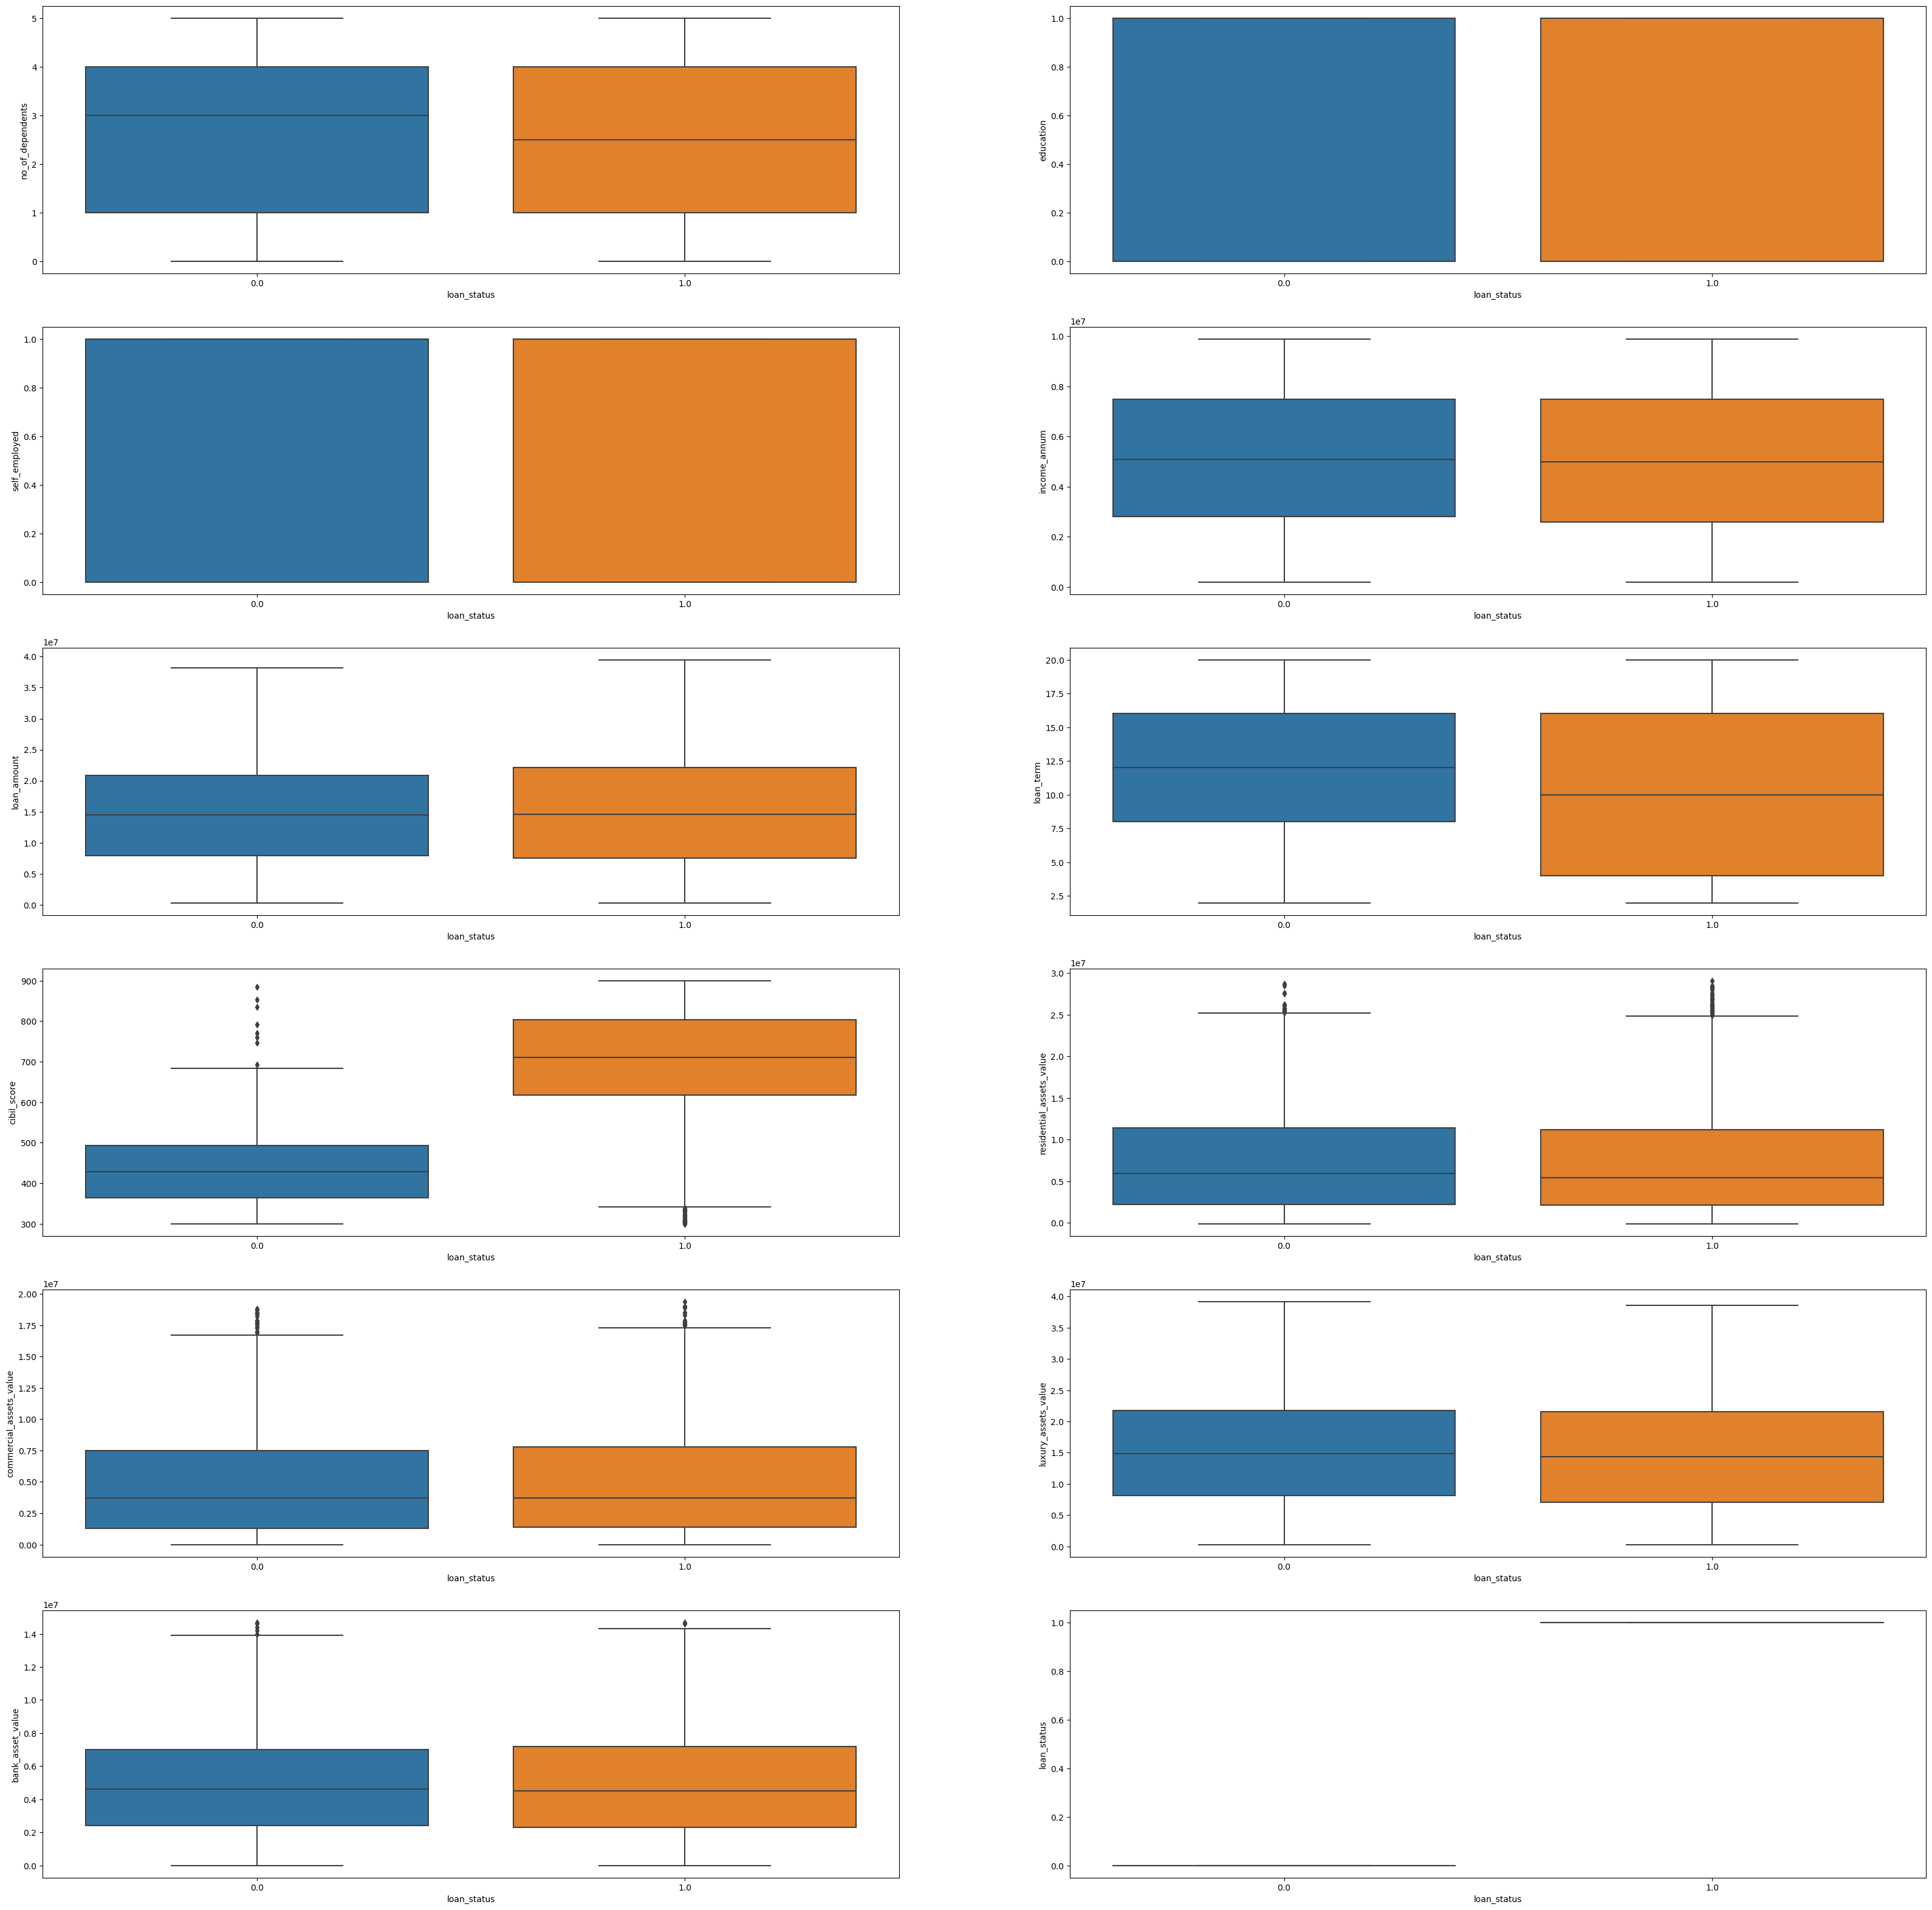

In [18]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df1.columns):
  sns.boxplot(x='loan_status',y=df1[col], ax = ax , data=df1)

In [19]:
loan_approval = df1[df1.loan_status == 1.0]

In [20]:
import statsmodels.api as sm
X = loan_approval.drop(columns = ['loan_amount'])
y = loan_approval.loan_amount

# Add a constant term
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:51:30   Log-Likelihood:                -43635.
No. Observations:                2656   AIC:                         8.729e+04
Df Residuals:                    2645   BIC:                         8.736e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
no_of_dependents         -6.107e+04   3.79e+04     -1.610      0.108   -1.35e+05    1.33e+04
education                 4.641e+04   1.29e+05      0.361      0.718   -2.06e+05    2.98e+05
self_employed            -1.318e+04   1.29e+05     -0.102      0.918   -2.65e+05    2.39e+05
income_annum                 2.9349      0.079     37.337      0.000       2.781       3.089
loan_term                 -2.49e+04   1.12e+04     -2.227      0.026   -4.68e+04   -2971.305
cibil_score              -3168.2737    524.899     -6.036      0.000   -4197.527   -2139.020
residential_assets_value     0.0080      0.013      0.622      0.534      -0.017       0.033
commercial_assets_value      0.0496      0.019      2.543      0.011       0.011       0.088
luxury_assets_value          0.0032      0.019      0.168      0.866      -0.034       0.041
bank_asset_value             0.0330      0.038      0.869      0.385      -0.041       0.107
loan_status                 2.6e+06    4.1e+05      6.339      0.000     1.8e+06     3.4e+06
==============================================================================
Omnibus:                       12.760   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.740
Skew:                          -0.127   Prob(JB):                      0.00104
Kurtosis:                       3.245   Cond. No.                     1.41e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Further Data Cleaning

### Removing Outliers

In [21]:
# define a function called 'outliers' which return a list of index of outliers
# IQR = Q3-Q1
# =/- 1.5*IQR
def outliers(df1, ft):
    Q1 = df1[ft].quantile(0.25)
    Q3 = df1[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q1 + 1.5 * IQR
    
    ls = df1.index[(df1[ft] < lower_bound) | (df1[ft] > upper_bound)]
    
    return ls

In [22]:
# create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['cibil_score', 'commercial_assets_value', 'bank_asset_value', 'residential_assets_value']:
    index_list.extend(outliers(df1, feature))

In [23]:
#define a function called 'remove' which returns a cleaned dataframe without outliers
def remove(df1, ls):
    ls = sorted(set(ls))
    df1 = df1.drop(ls)
    return df1

In [24]:
# updated dataframe
df1_cleaned = remove(df1, index_list)

In [25]:
df1_cleaned.shape

(3158, 12)

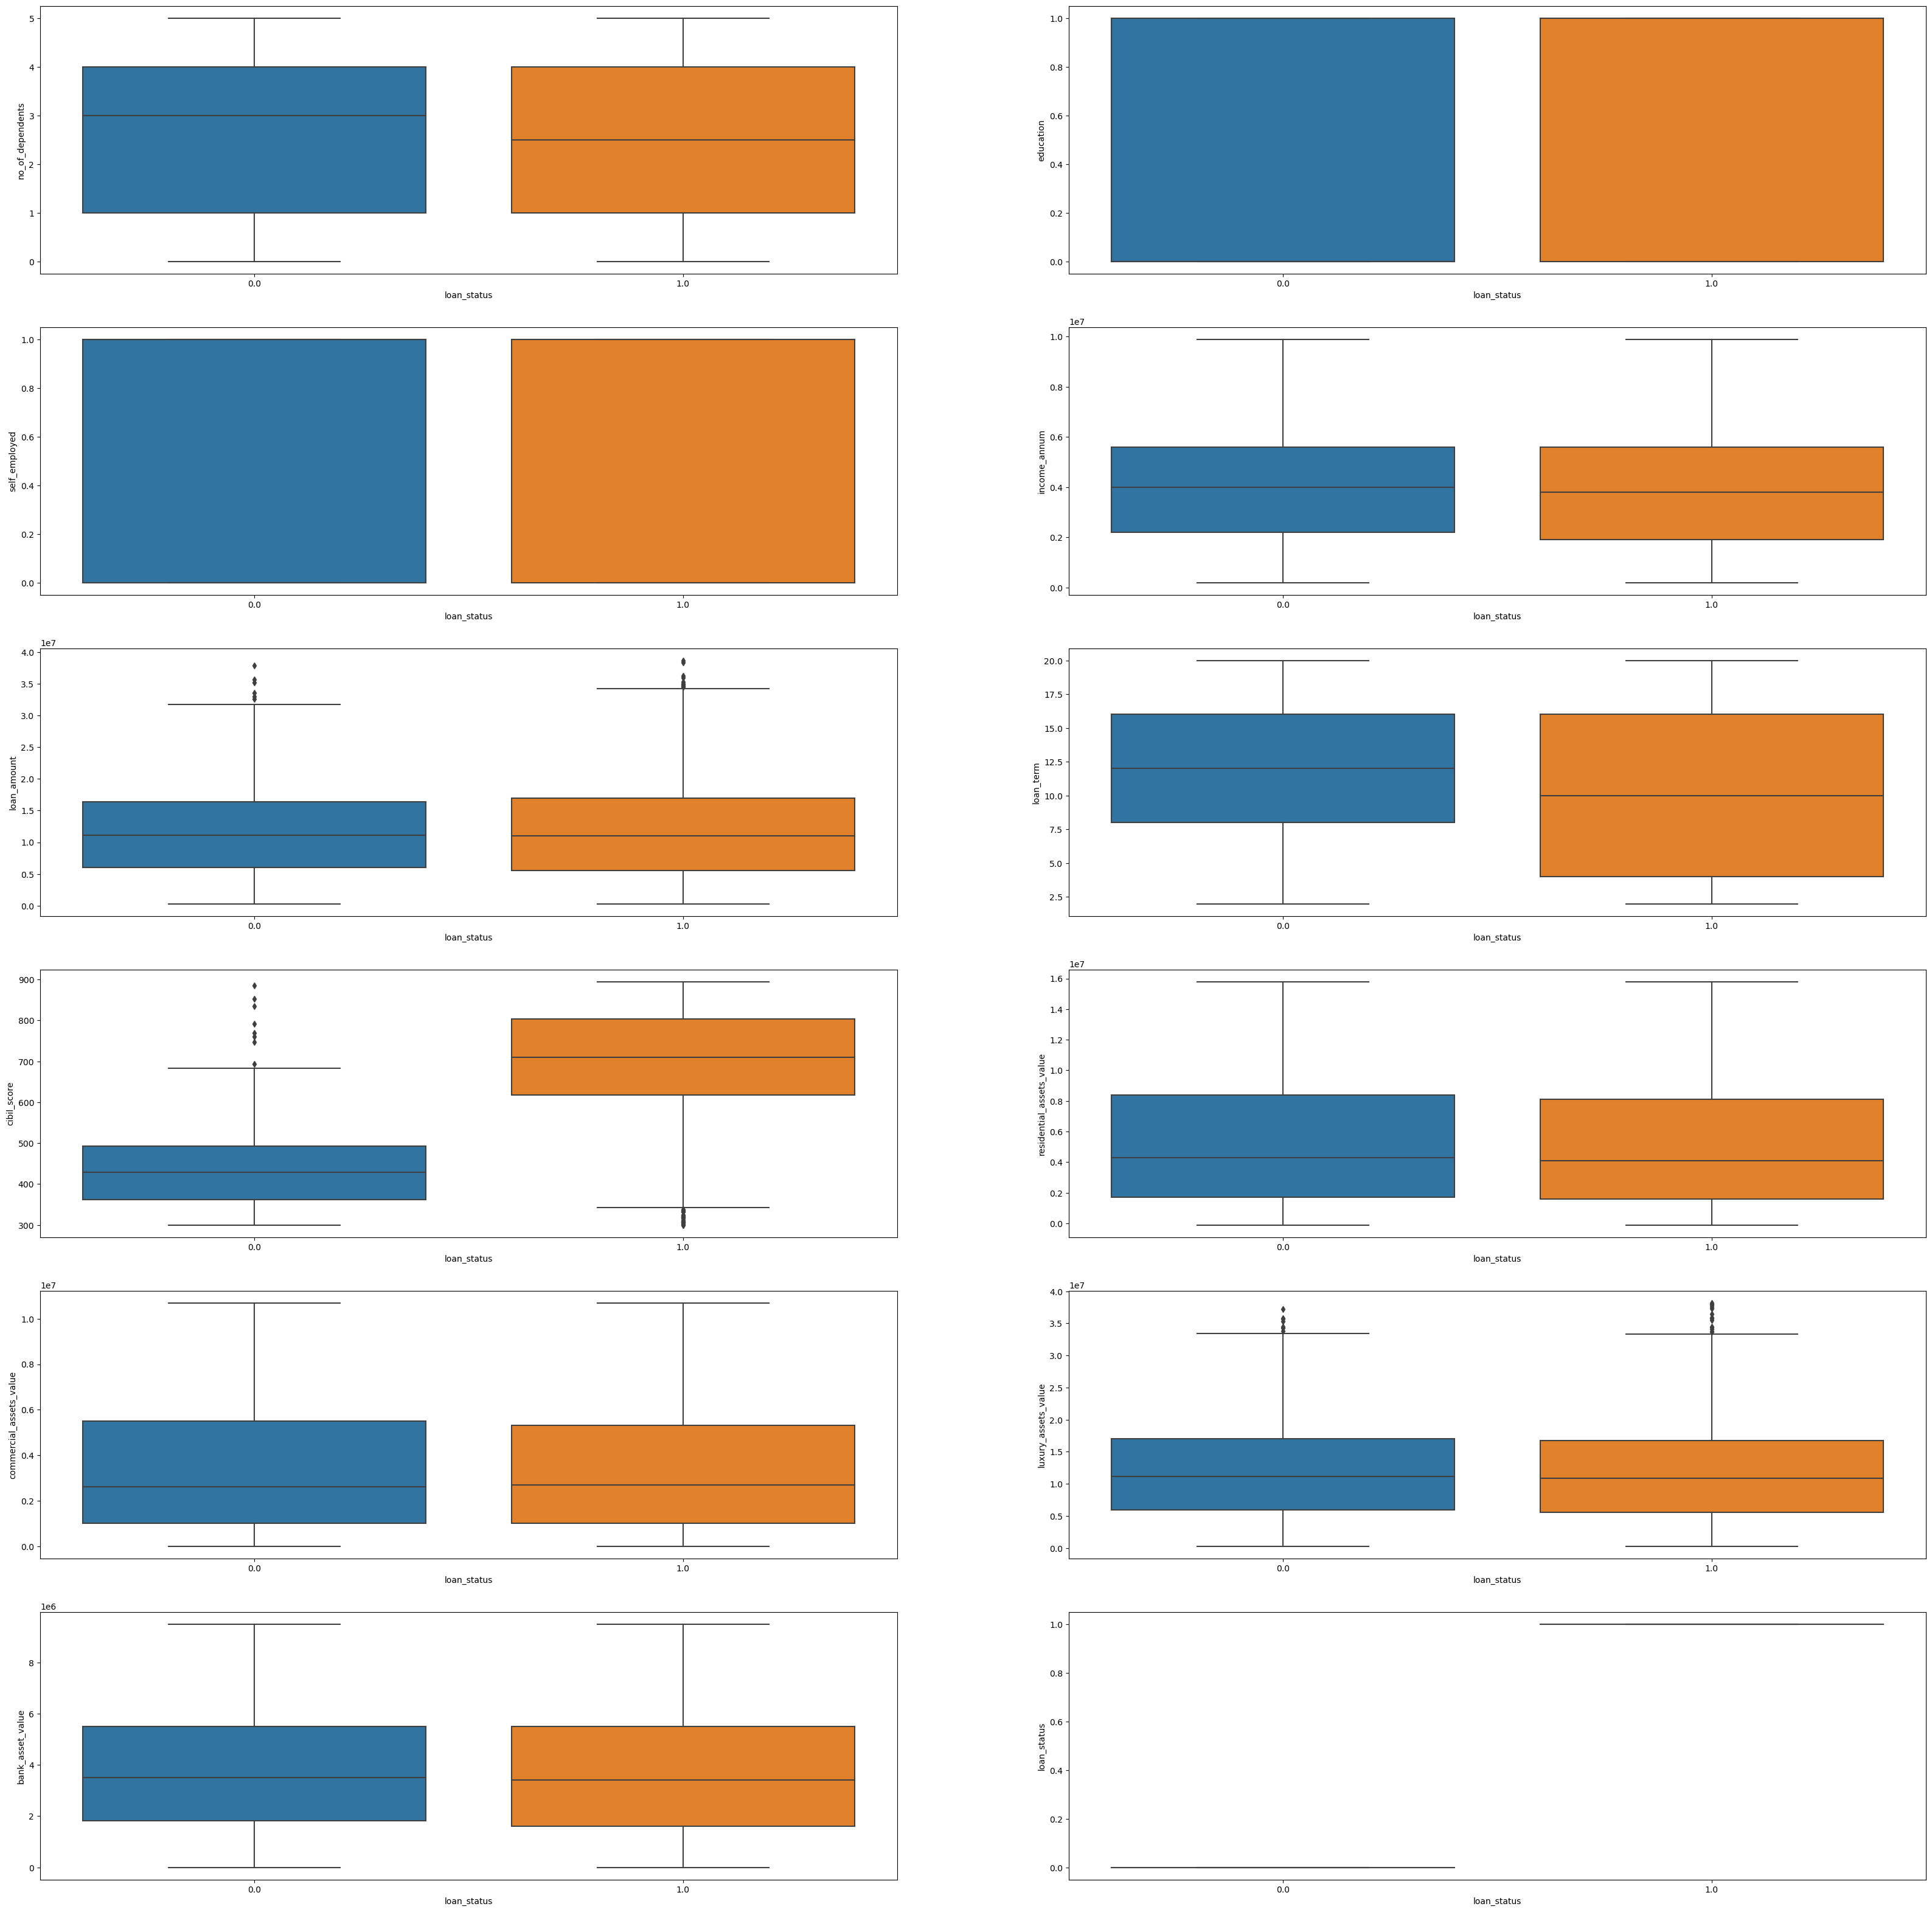

In [26]:
fig, axes = plt.subplots(nrows = 6, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, df1.columns):
  sns.boxplot(x='loan_status',y=df1[col], ax = ax , data=df1_cleaned)

In [27]:
loan_approval = df1_cleaned[df1_cleaned.loan_status == 1.0]

## Analysing Data

In [28]:
loan_approval.describe()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1964.000000,1964.000000,1.964000e+03,1.964000e+03,1.964000e+03,1.964000e+03,1964.0
mean,2.491853,0.503564,0.509165,3.946843e+06,1.194277e+07,10.370672,702.786660,5.199898e+06,3.420010e+06,1.176095e+07,3.721232e+06,1.0
std,1.703861,0.500115,0.500043,2.376058e+06,7.685669e+06,5.926453,123.875493,4.229586e+06,2.849419e+06,7.619905e+06,2.405651e+06,0.0
min,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,1.0
25%,1.000000,0.000000,0.000000,1.900000e+06,5.500000e+06,4.000000,618.000000,1.600000e+06,1.000000e+06,5.575000e+06,1.600000e+06,1.0
50%,2.500000,1.000000,1.000000,3.800000e+06,1.100000e+07,10.000000,710.000000,4.100000e+06,2.700000e+06,1.090000e+07,3.400000e+06,1.0
75%,4.000000,1.000000,1.000000,5.600000e+06,1.700000e+07,16.000000,804.000000,8.100000e+06,5.300000e+06,1.670000e+07,5.500000e+06,1.0
max,5.000000,1.000000,1.000000,9.900000e+06,3.870000e+07,20.000000,895.000000,1.580000e+07,1.070000e+07,3.820000e+07,9.500000e+06,1.0


In [41]:
import statsmodels.api as sm
X = loan_approval.drop(columns = ['loan_amount'])
y = loan_approval.loan_amount

# Add a constant term
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1427.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:56:17   Log-Likelihood:                -31846.
No. Observations:                1964   AIC:                         6.371e+04
Df Residuals:                    1953   BIC:                         6.378e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
no_of_dependents         -7.249e+04   3.55e+04     -2.044      0.041   -1.42e+05   -2953.883
education                -4.787e+04   1.21e+05     -0.396      0.692   -2.85e+05    1.89e+05
self_employed            -2.178e+05   1.21e+05     -1.803      0.071   -4.55e+05    1.91e+04
income_annum                 2.7297      0.089     30.821      0.000       2.556       2.903
loan_term                -1.355e+04   1.04e+04     -1.301      0.193    -3.4e+04    6878.703
cibil_score              -2757.5733    498.333     -5.534      0.000   -3734.893   -1780.253
residential_assets_value    -0.0044      0.017     -0.256      0.798      -0.039       0.030
commercial_assets_value      0.0424      0.026      1.632      0.103      -0.009       0.093
luxury_assets_value          0.0623      0.023      2.744      0.006       0.018       0.107
bank_asset_value             0.0999      0.048      2.063      0.039       0.005       0.195
loan_status               2.336e+06   3.87e+05      6.035      0.000    1.58e+06     3.1e+06
==============================================================================
Omnibus:                       25.223   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.608
Skew:                          -0.144   Prob(JB):                     1.85e-08
Kurtosis:                       3.593   Cond. No.                     1.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-Squared: 0.8760646393708231
Intercept      -6535.618932
income_annum       3.027560
dtype: float64


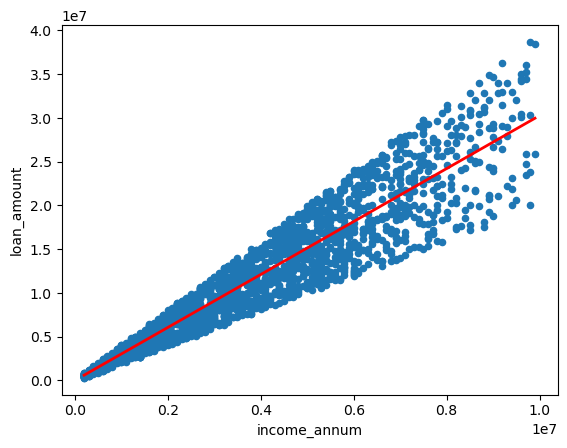

eval_env: 1


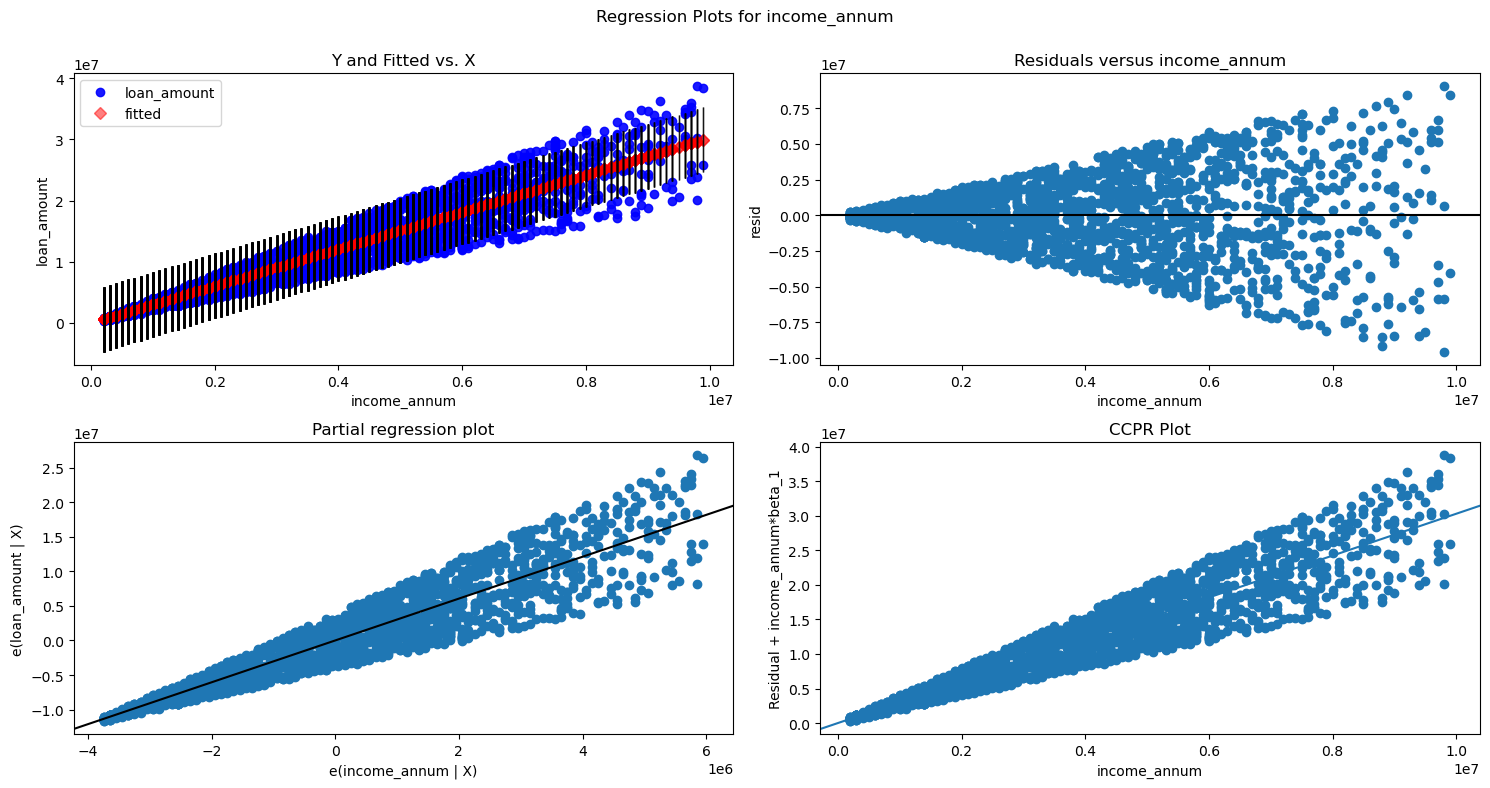

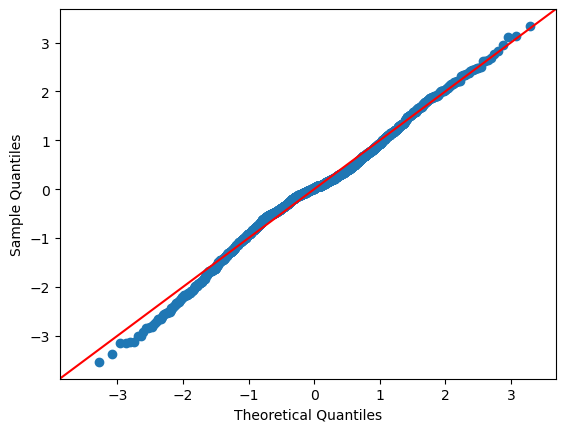

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'loan_amount~income_annum'
model = smf.ols(formula=f, data=loan_approval).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'income_annum': [loan_approval.income_annum.min(), loan_approval.income_annum.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
loan_approval.plot(kind='scatter', x='income_annum', y='loan_amount');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "income_annum", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 1.0106933845399624e-08
Intercept           1.194164e+07
no_of_dependents    4.534790e+02
dtype: float64


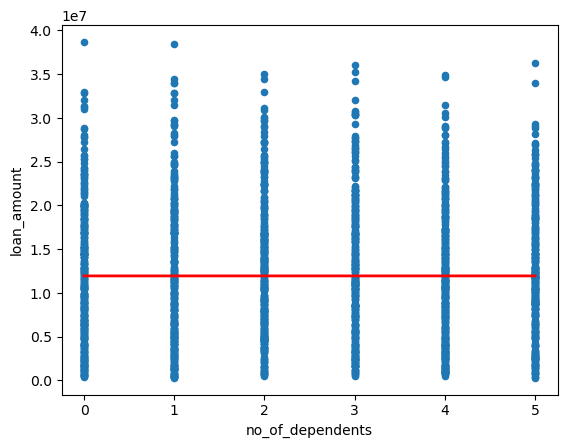

eval_env: 1


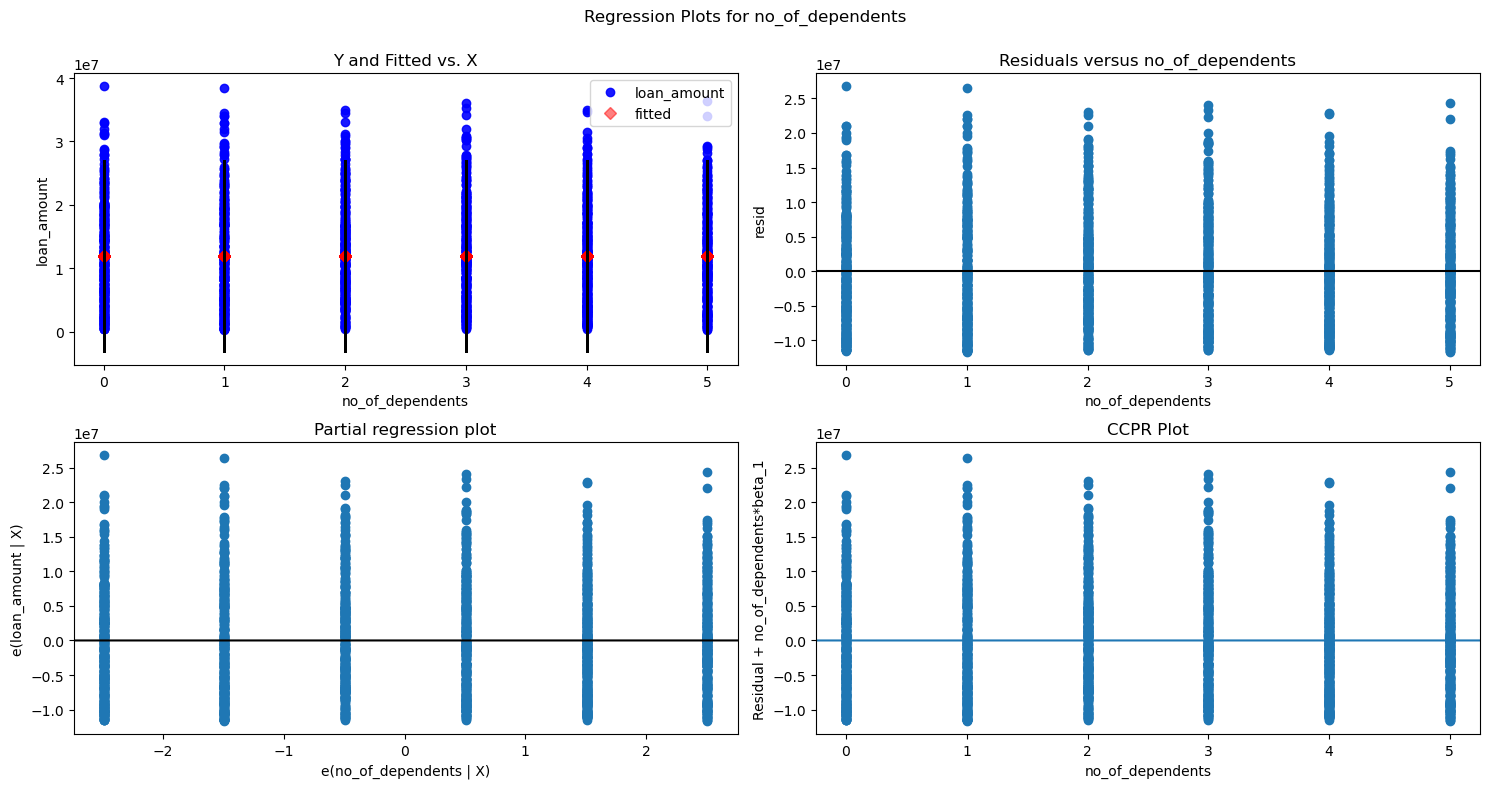

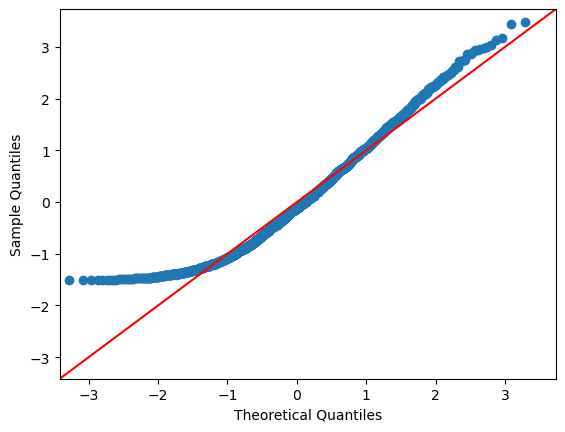

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'loan_amount~no_of_dependents'
model = smf.ols(formula=f, data=loan_approval).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'no_of_dependents': [loan_approval.no_of_dependents.min(), loan_approval.no_of_dependents.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
loan_approval.plot(kind='scatter', x='no_of_dependents', y='loan_amount');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "no_of_dependents", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.7821730029325537
Intercept              1.451554e+06
luxury_assets_value    8.920384e-01
dtype: float64


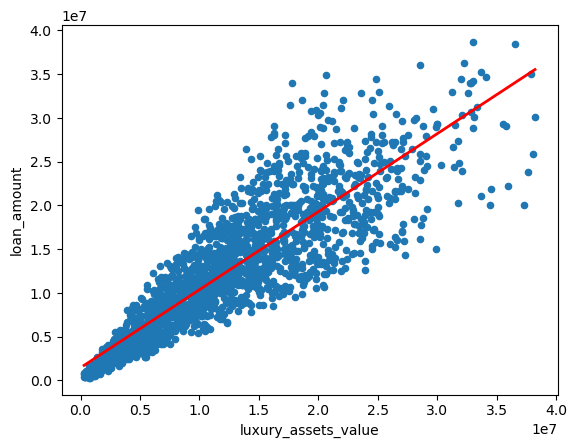

eval_env: 1


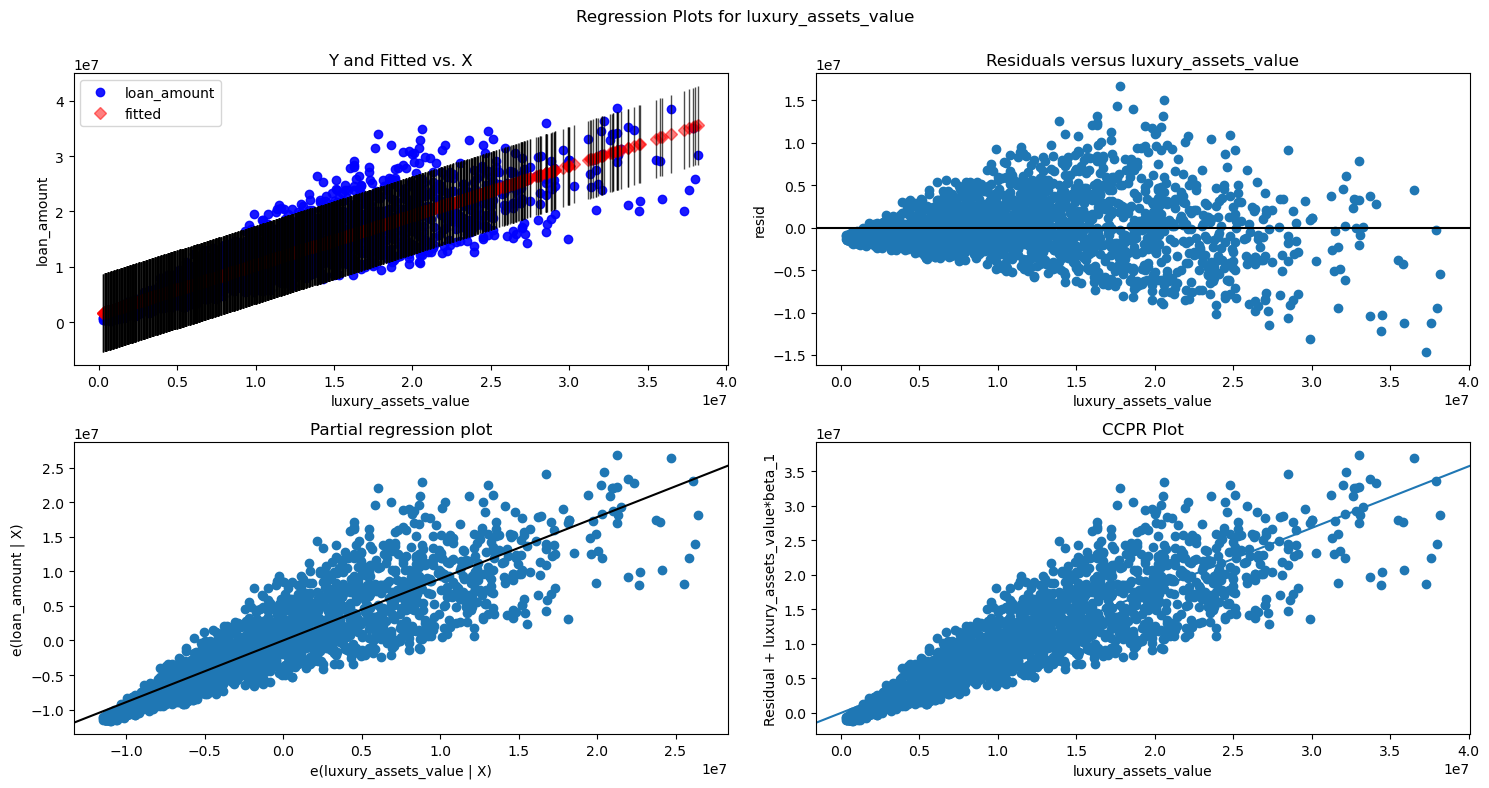

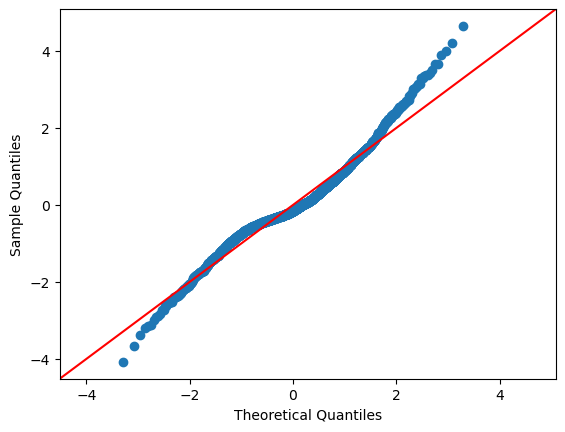

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'loan_amount~luxury_assets_value'
model = smf.ols(formula=f, data=loan_approval).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'luxury_assets_value': [loan_approval.luxury_assets_value.min(), loan_approval.luxury_assets_value.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
loan_approval.plot(kind='scatter', x='luxury_assets_value', y='loan_amount');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "luxury_assets_value", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.6502607697116956
Intercept           2.355837e+06
bank_asset_value    2.576279e+00
dtype: float64


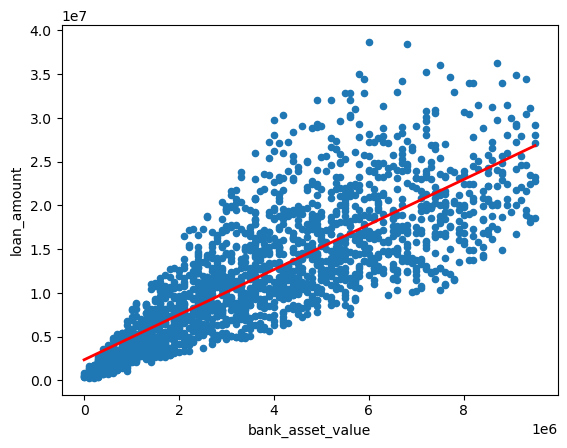

eval_env: 1


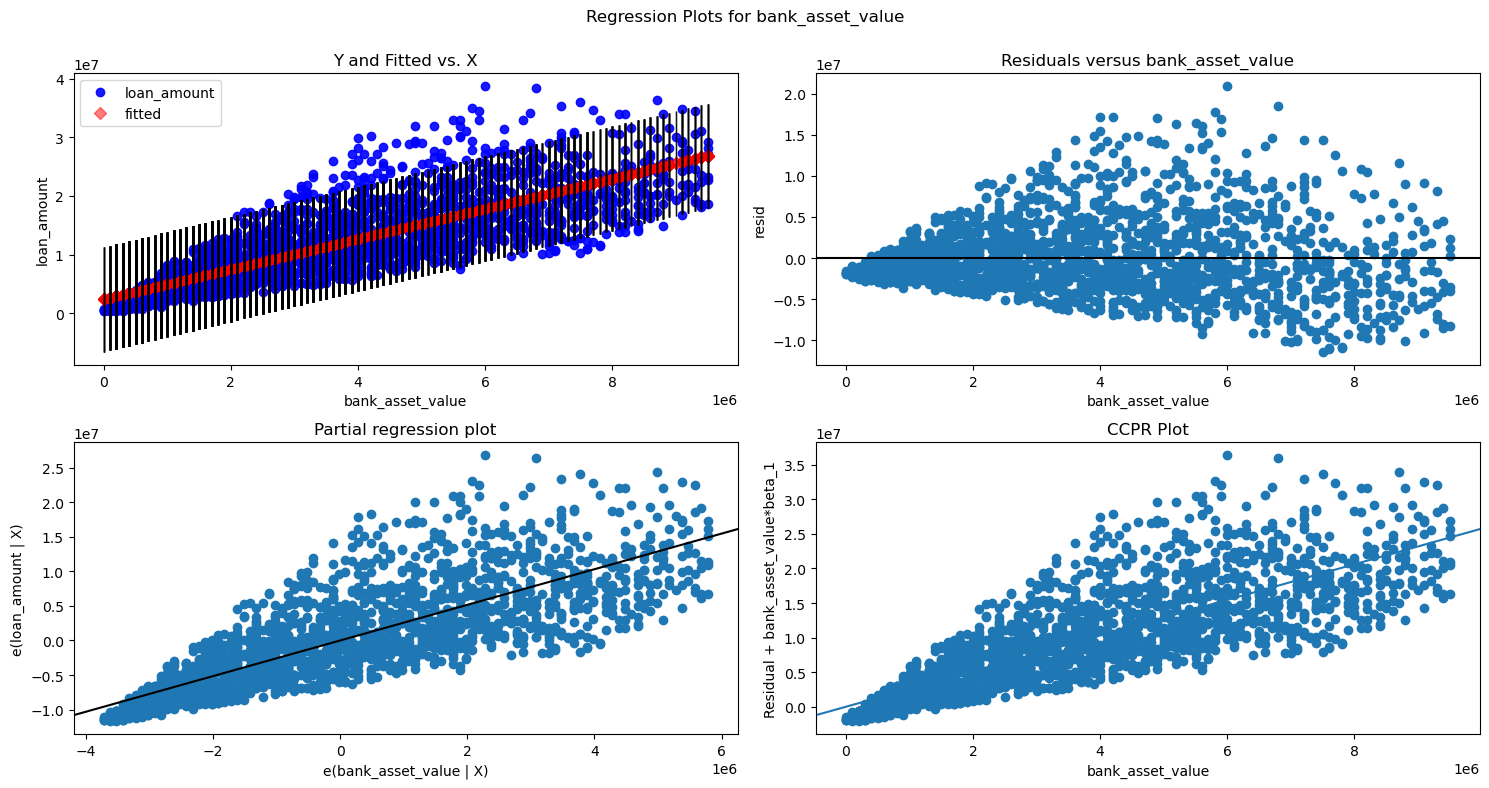

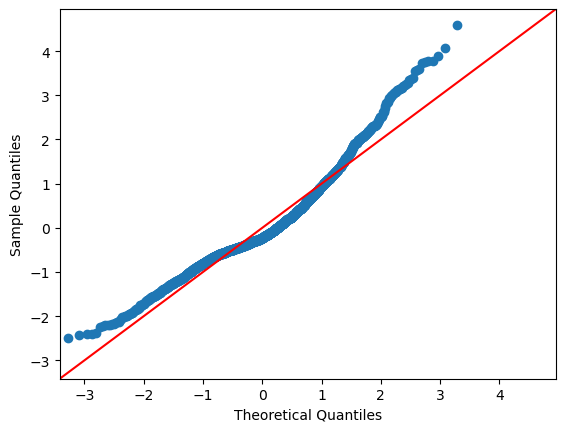

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'loan_amount~bank_asset_value'
model = smf.ols(formula=f, data=loan_approval).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'bank_asset_value': [loan_approval.bank_asset_value.min(), loan_approval.bank_asset_value.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
loan_approval.plot(kind='scatter', x='bank_asset_value', y='loan_amount');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bank_asset_value", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

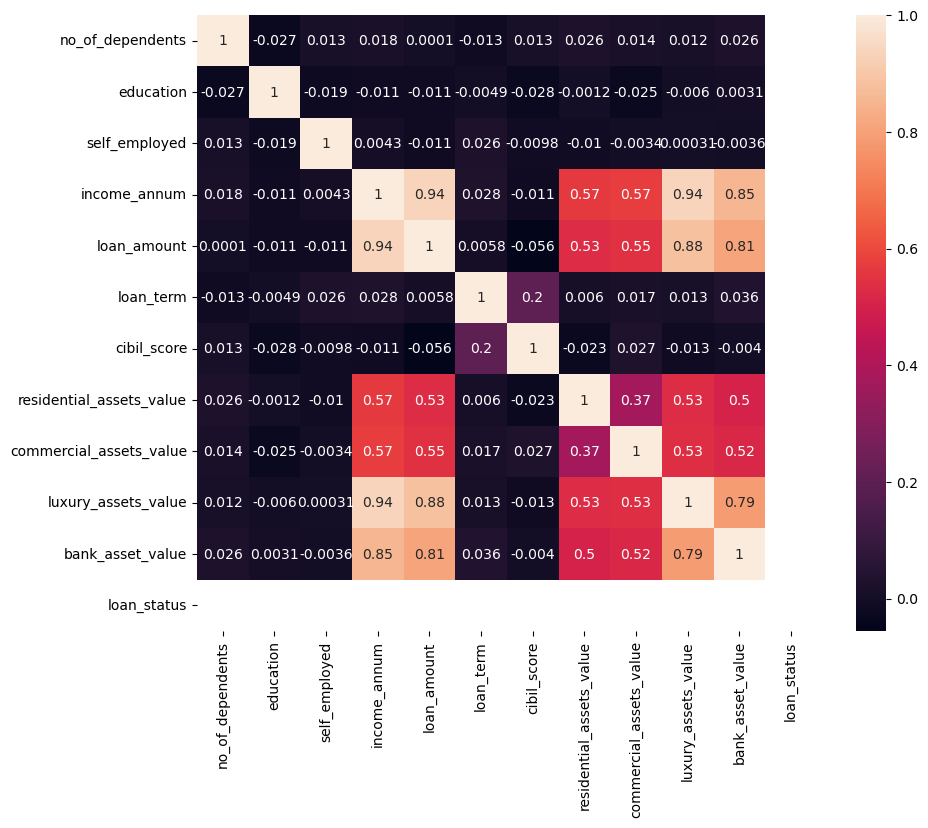

In [34]:
# checking for multicollinearity
plt.figure(figsize=(10,8))
sns.heatmap(loan_approval.corr(), annot=True,)
plt.show()

In [35]:
# looking at the loan amount sections:
    # we can see that it have bad correlation with no of dependents, loan term and cibil score
    # We can see that it have good correlations with income annum, resudential, commerical, luxury and bank asset value

## Building model

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

x = loan_approval[['income_annum', 'no_of_dependents', 'luxury_assets_value', 'bank_asset_value']]
y = loan_approval[[ 'loan_amount']]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model_1 = sm.OLS(y, x).fit()
predictions = model_1.predict(x) 
 
model_summary = model_1.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     3494.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:58:36   Log-Likelihood:                -31867.
No. Observations:                1964   AIC:                         6.374e+04
Df Residuals:                    1959   BIC:                         6.377e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.504e+05   1.47e+05      1.021      0.308   -1.39e+05    4.39e+05
income_annum            2.7463      0.087     31.599      0.000       2.576       2.917
no_of_dependents    -7.475e+04   3.57e+04     -2.091      0.037   -1.45e+05   -4641.800
luxury_assets_value     0.0645      0.023      2.817      0.005       0.020       0.109
bank_asset_value        0.1023      0.049      2.102      0.036       0.007       0.198
==============================================================================
Omnibus:                       25.626   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.322
Skew:                          -0.156   Prob(JB):                     2.14e-08
Kurtosis:                       3.579   Cond. No.                     3.75e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **Adjusted r squared** indicated that 87% of the data can be explained

* **Prob F statistic** showed that the p value is under 0.05, signify the overall significance of the model, is supporting is usefulness in predicting loan amount

* The coefficients obtained from the model provide valuable insights into the relationships between the independent variables and the loan amount. 

    * **income annum:** indicates a positive cofficient of 2.743. This suggested that an increased in annual income leads to higher estimated loan.
    * **no of independent:** shows an opposite coefficients, implying that a higher number of dependents corresponds to a lower estimated loan amount. 
    * As for both **luxury and bank asset** value have a positive coefficients of 0.0645 and 0.1023, respectively, indicating that higher values of luxury assets and bank assets result in higher estimated loan amounts.

## Model Validations (Train/Test Split)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 ,random_state = 42)

In [46]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_hat_train = regr.predict(X_train)
y_hat_test = regr.predict(X_test)

In [48]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 7148506403371.291
Test Mean Squared Error:  6993478780624.626


* The train MSE indicates that, on average, the squared difference between the predicted values and the actual values of the target variable in the training dataset is approximately 7,148,506,403,371.291

* The test MSE indicates that, on average, the squared difference between the model's predictions and the actual values of the target variable in the test dataset is approximately 6,993,478,780,624.626.

* We can see that the test MSE is slightly lower than the train MSE. It suggests that the model is not overfitting to the training data. Overfitting occurs when a model performs well on the training data but poorly on unseen (test) data, indicating that it memorizes the training data rather than learning general patterns.

## Conclusion

The loan prediction model demonstrates strong potential in accurately estimating loan amounts by considering several crucial financial attributes of loan applicants. Notably, the model identifies the following key factors as significant predictors of loan amount:

1. **High Income Salary**: Applicants with higher income salaries tend to receive higher estimated loan amounts, indicating that a strong financial standing positively influences loan approval decisions. The model leverages this relationship to provide personalised loan amount estimates based on the applicants' income levels.

2. **Low Number of Dependents:** A smaller number of dependents in an applicant's household is associated with higher estimated loan amounts. This finding suggests that individuals with fewer financial dependents may have greater capacity to take on additional loan obligations, leading to more favourable loan offers.

3. **High Luxury Asset Value:** The model recognizes the value of luxury assets owned by the applicants as a significant factor in determining loan amounts. Individuals with higher luxury asset values may have additional collateral or resources to support their loan applications, resulting in increased loan approval amounts.

4. **High Bank Asset Value:** The value of existing assets held in bank accounts also plays a vital role in the model's estimation of loan amounts. Applicants with substantial bank asset values are likely to receive higher estimated loan amounts, as these assets provide further assurance of financial stability and repayment capacity.

By incorporating these financial attributes into the loan prediction model, lenders can make well-informed decisions and offer loan amounts tailored to each applicant's financial profile. This approach enhances the accuracy and fairness of loan approvals, reduces the risk of defaults, and ensures responsible lending practices.


## Limitation

* The credit scoring requires further examination, as depicted in the graph, which shows a positive correlation between higher credit scores and a greater likelihood of loan approval. However, the OLS regression analysis reveals negative coefficients associated with credit scores.

* Similar trends are observed for loan term, where shorter loan durations appear to have a higher probability of loan approval.

* Additionally, it is essential to analyze loan types, such as business or personal loans, to gain insights into client borrowing and repayment behaviors. This analysis will enhance our understanding of borrowers' financial behaviors and preferences.